In [17]:
from torch.utils.data import DataLoader
import torch

img = torch.randn(200, 12288)
dl = DataLoader(img, batch_size=2, shuffle=True)

In [13]:
img.shape

torch.Size([200, 12288])

In [34]:
dl.dataset.shape

torch.Size([200, 12288])

In [24]:
from torch import nn
encoder = nn.Linear(12288, 2)
decoder = nn.Linear(2, 12288)

In [36]:
encoded_data_per_eval = []
decoded_data_per_eval = []
raw_data_per_eval = []

device = "cpu"


for imgs in dl:

    imgs = imgs.to(device)
    encoded = encoder(imgs)
    decoded = decoder(encoded)
    encoded_data_per_eval.append(encoded)
    decoded_data_per_eval.append(decoded)
    raw_data_per_eval.append(imgs)


encoded_data = torch.cat(encoded_data_per_eval, dim=0)
decoded_data = torch.cat(decoded_data_per_eval, dim=0)
raw_data = torch.cat(raw_data_per_eval, dim=0)


torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size([2, 12288])
torch.Size(

In [37]:
encoded_data.shape

torch.Size([200, 2])

In [38]:
np_encoded_data = encoded_data.detach().cpu().numpy()
np_encoded_data.shape

(200, 2)

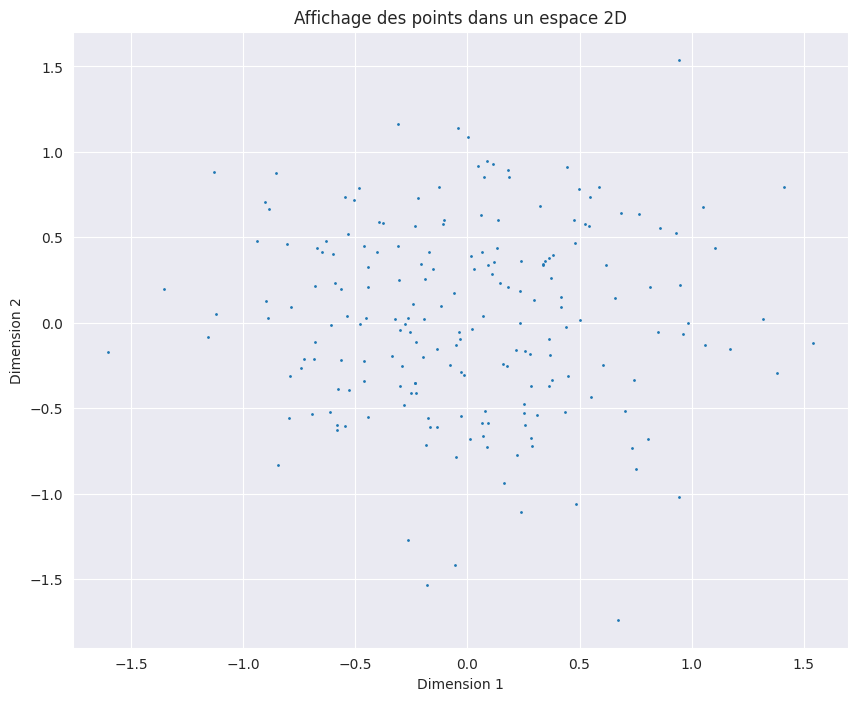

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(np_encoded_data[:, 0], np_encoded_data[:, 1], s=1) # s est la taille des points
plt.title('Affichage des points dans un espace 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

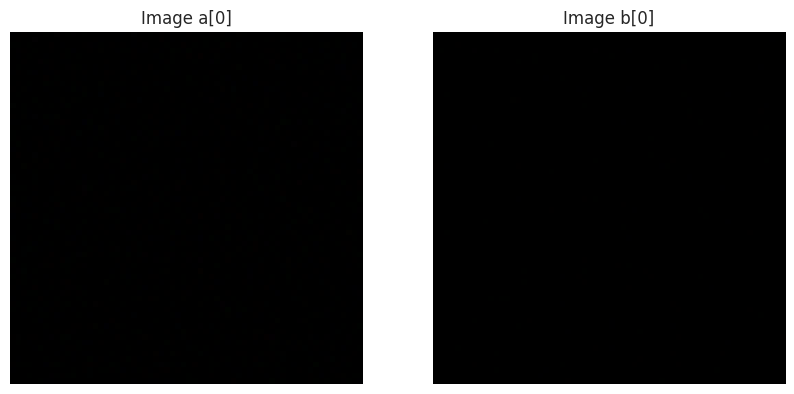

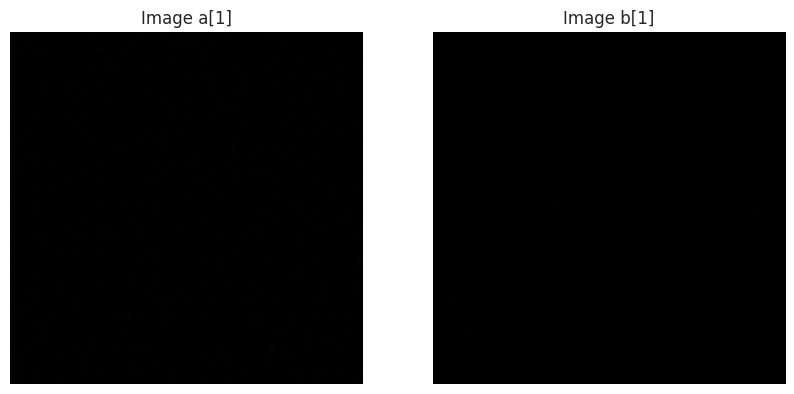

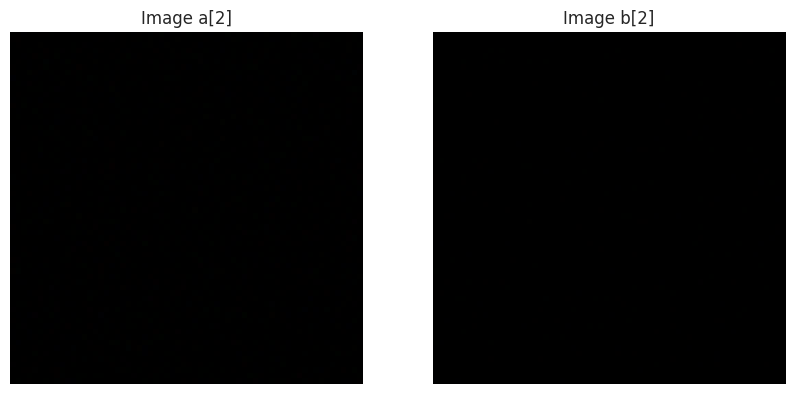

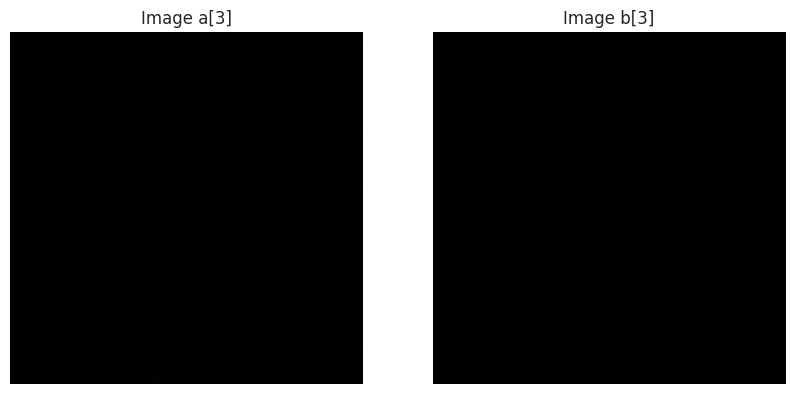

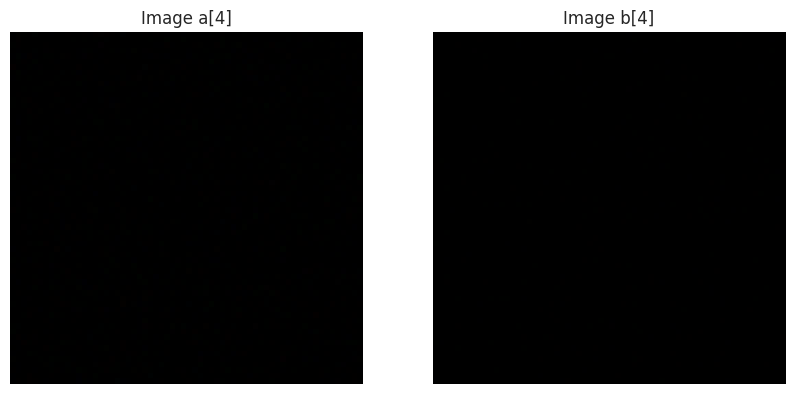

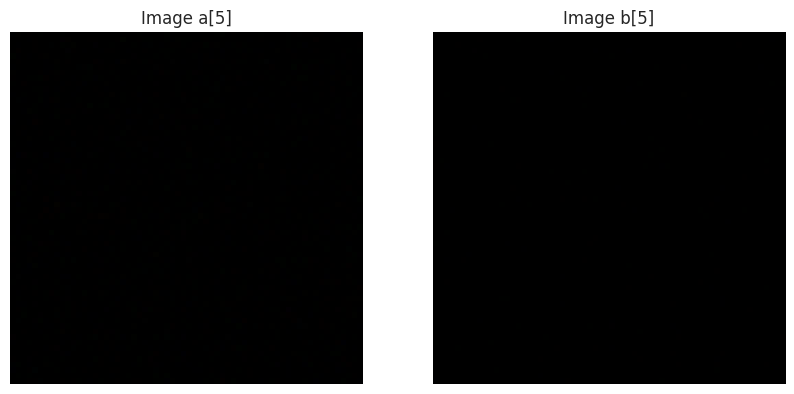

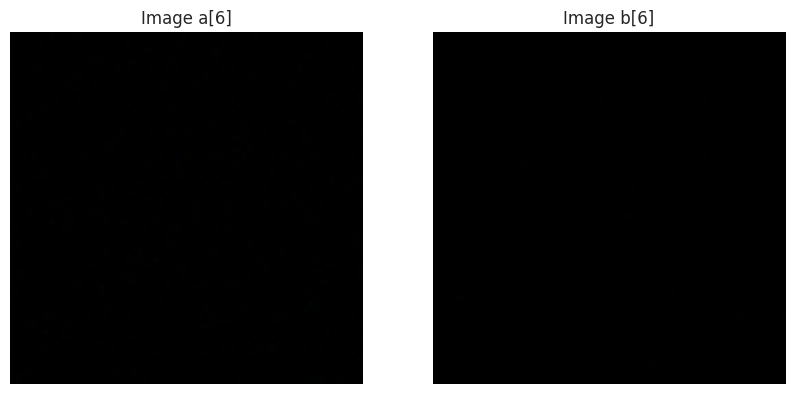

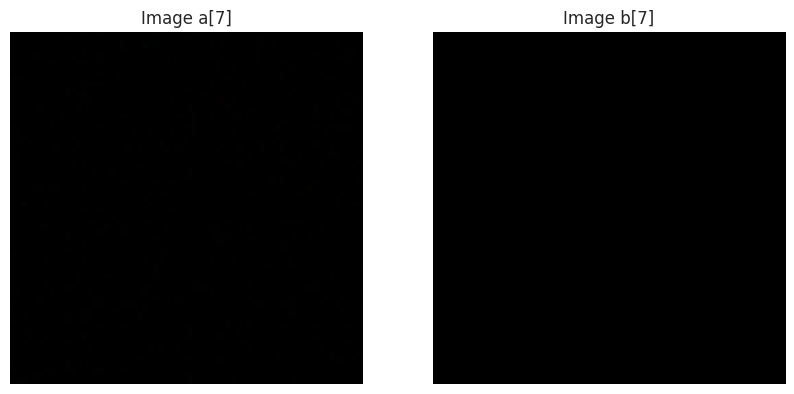

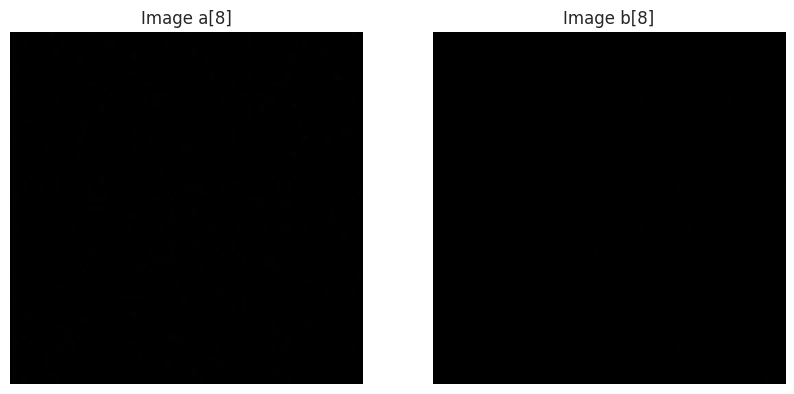

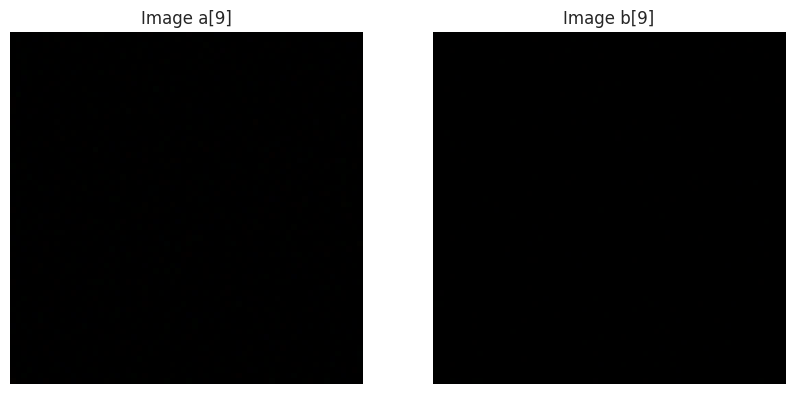

In [46]:
import numpy as np
np_decoded_data = decoded_data.detach().cpu().numpy()
np_raw_data = raw_data.detach().cpu().numpy()
for i in range(10):
    # Transformation des vecteurs en images 28x28
    image_a = np_raw_data[i].reshape(64, 64, 3)
    image_b = np_decoded_data[i].reshape(64, 64, 3)
    image_a = np.clip(image_a, 0, 255).astype(np.uint8)
    image_b = np.clip(image_b, 0, 255).astype(np.uint8)

    # Création d'une figure avec deux sous-graphiques côte à côte
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Affichage des images
    axes[0].imshow(image_a, cmap='gray')
    axes[0].set_title(f'Image a[{i}]')
    axes[0].axis('off')

    axes[1].imshow(image_b, cmap='gray')
    axes[1].set_title(f'Image b[{i}]')
    axes[1].axis('off')

In [41]:
import numpy as np
points = np_encoded_data
# Définir les limites du quadrillage
x_min, x_max = points[:, 0].min(), points[:, 0].max()
y_min, y_max = points[:, 1].min(), points[:, 1].max()
grid_size = 20
x_coords = np.linspace(x_min, x_max, grid_size)
y_coords = np.linspace(y_min, y_max, grid_size)

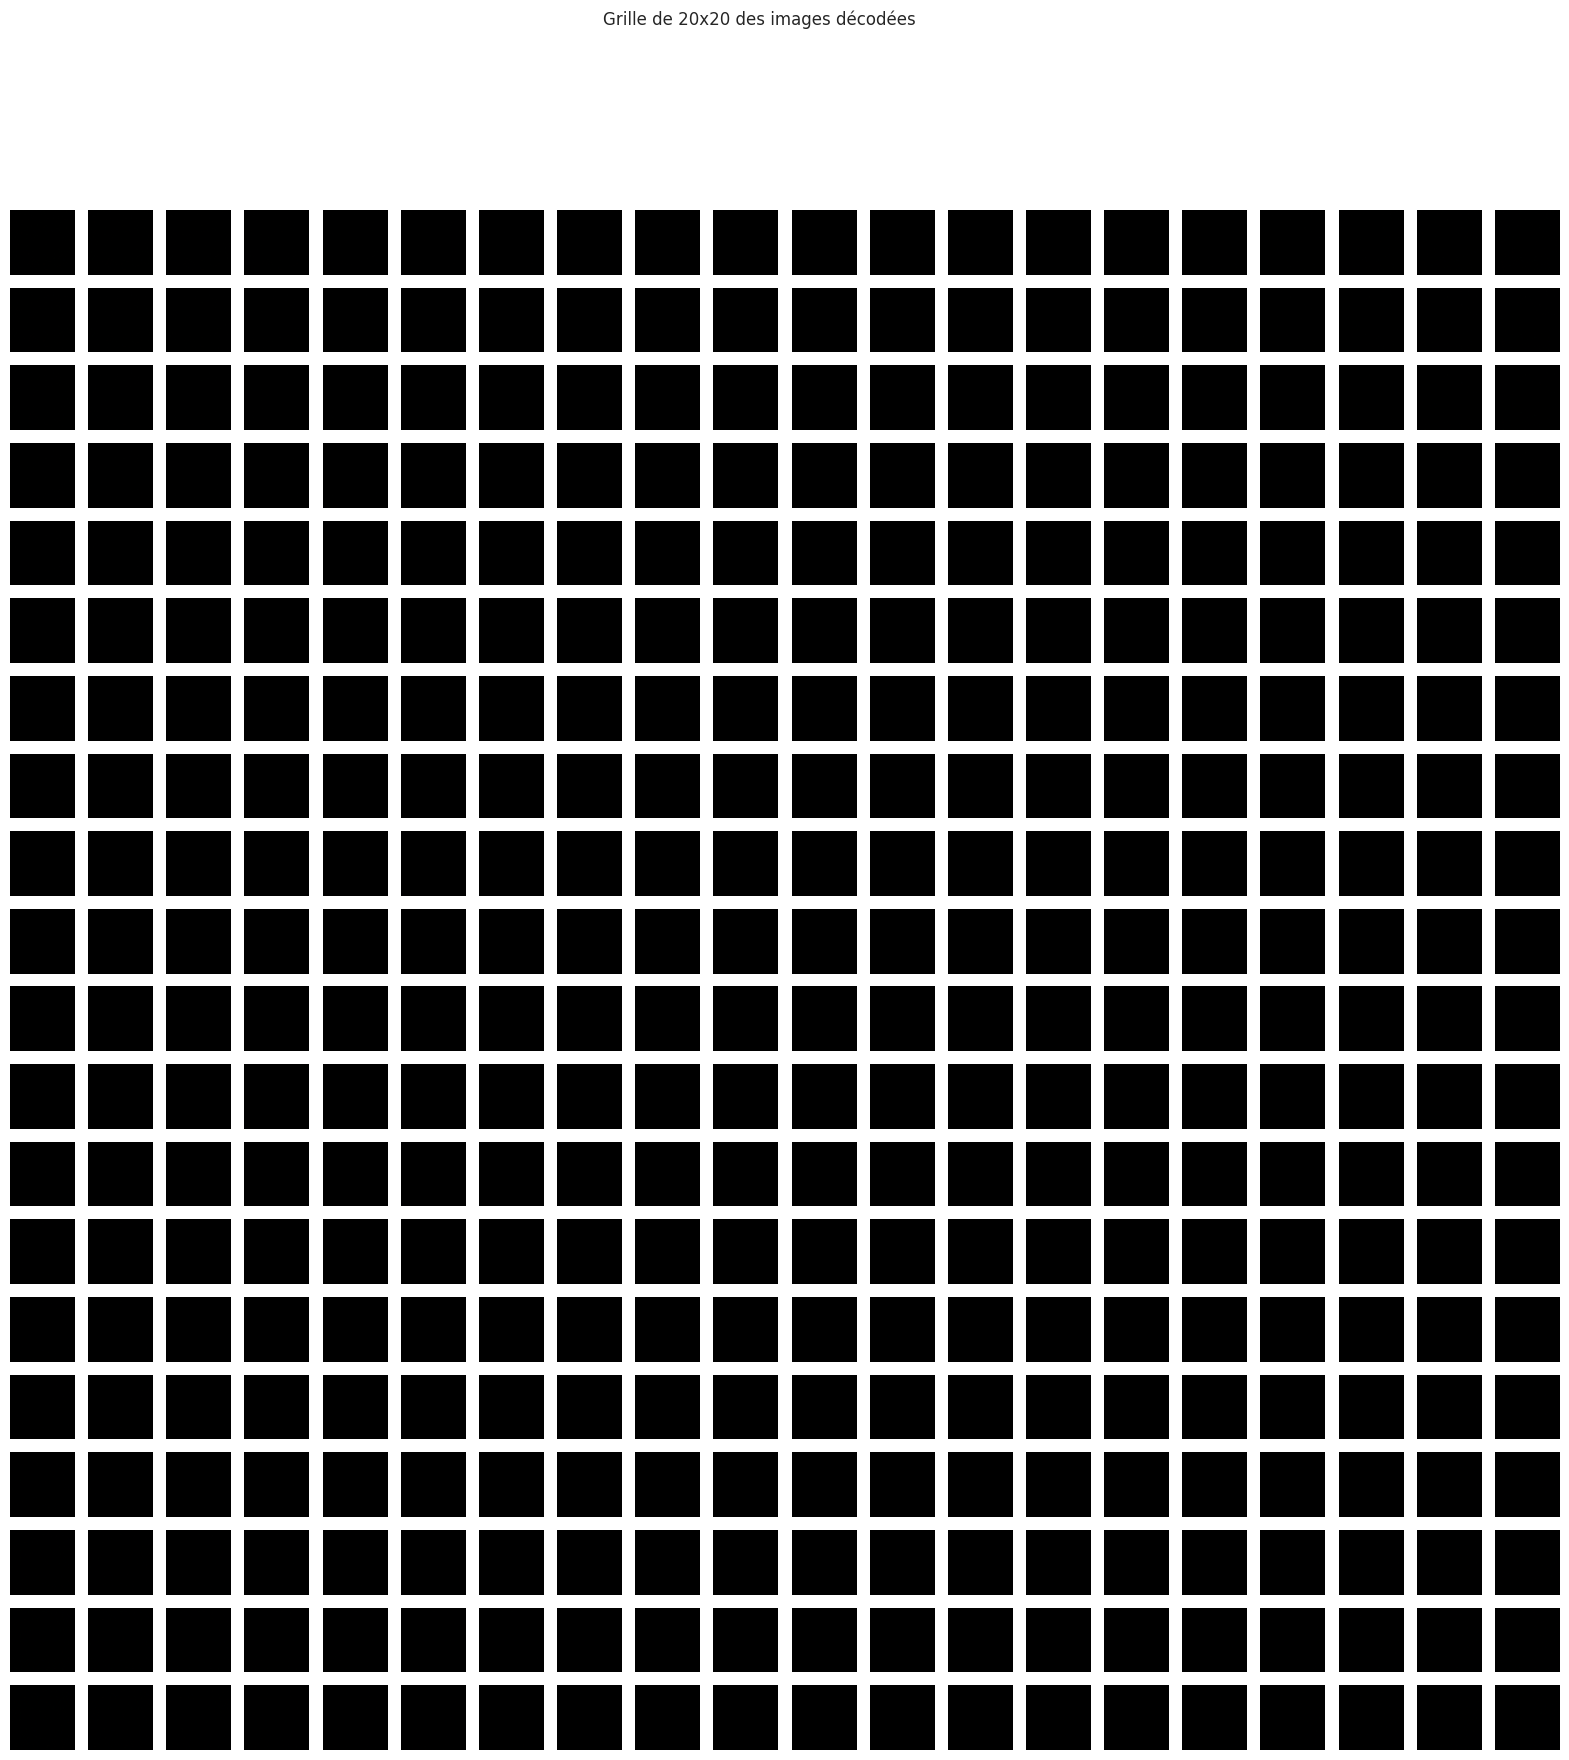

In [45]:
plt.figure(figsize=(20, 20))
for i in range(grid_size):
    for j in range(grid_size):
        # Trouver le point le plus proche de la cellule (i, j)
        x, y = x_coords[i], y_coords[j]
        tensor = torch.tensor([x, y], dtype=torch.float32).to(device)
        pt = decoder(tensor)

        pt = pt.detach().cpu().numpy()



        image = pt.reshape(64, 64, 3)
        image = np.clip(image, 0, 255).astype(np.uint8)

        # Afficher l'image dans la grille
        plt.subplot(grid_size, grid_size, i * grid_size + j + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

plt.suptitle('Grille de 20x20 des images décodées')
plt.show()